# DAY_061

***
### [作業]
- 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

### [參考作業]
- [Visualizing Data using t-SNE](https://youtu.be/RJVL80Gg3lA)
- [Unsupervised Learning](https://youtu.be/GBUEjkpoxXc)

In [1]:
from sklearn import datasets, manifold
import numpy as np
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import time as time

digits = datasets.load_digits()
X = digits.data
y = digits.target
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

In [2]:
# Create T-SNE model
tsne = manifold.TSNE(n_components=2, learning_rate=1000, init='pca', random_state=43)

Computing t-SNE embedding


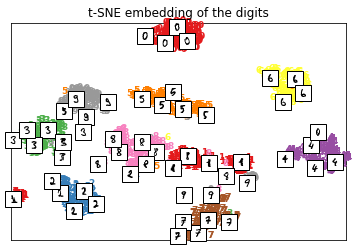

Duration : 3.315260410308838sec


In [3]:
def plot_embedding(X, title=None):
    # Z-normalization on 
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    # Visualize datasets
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")

X_tsne = tsne.fit_transform(X)

t0 = time.time()
plot_embedding(X_tsne,
               "t-SNE embedding of the digits")
plt.show()
t1 = time.time()
print(f'Duration : {t1 - t0}sec')